## VIEWS
- source data from the 2023-24 views competition
- spans from 1990 to 2023 
- competition info [here](https://viewsforecasting.org/research/prediction-challenge-2023/#:~:text=The%202023%2F24%20VIEWS%20prediction%20challenge&text=Preliminary%20forecasts%20will%20be%20requested,various%20outputs%20of%20that%20one.)
- country codes under gw listed [here](https://www.uky.edu/~clthyn2/replace_ccode_country.do)

In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import sys
sys.path.append("/Users/kaylahuang/Desktop/GitHub/conflicts/components/")

from views_cleaner import VIEWSCleaner

In [8]:
filename = '../data/views23/features/cm/cm_features.parquet'

features = pd.read_parquet(filename, engine='pyarrow')

## basic eda
features.shape # (77372, 126)
print(list(features.columns))
""" ['month_id', 'country_id', 'gleditsch_ward', 'ged_sb', 'ged_ns', 'ged_os', 'acled_sb', 
'acled_sb_count', 'acled_os', 'ged_sb_tsum_24', 'wdi_sp_pop_totl', 'ged_sb_tlag_1', 
'ged_sb_tlag_2', 'ged_sb_tlag_3', 'ged_sb_tlag_4', 'ged_sb_tlag_5', 'ged_sb_tlag_6', 
'ged_os_tlag_1', 'wdi_ag_lnd_frst_k2', 'wdi_dt_oda_odat_pc_zs', 'wdi_ms_mil_xpnd_gd_zs', 
'wdi_ms_mil_xpnd_zs', 'wdi_nv_agr_totl_kd', 'wdi_nv_agr_totl_kn', 'wdi_ny_gdp_pcap_kd', 
'wdi_sp_dyn_le00_in', 'wdi_se_enr_prim_fm_zs', 'wdi_se_enr_prsc_fm_zs', 'wdi_se_prm_nenr', 
'wdi_sh_sta_maln_zs', 'wdi_sh_sta_stnt_zs', 'wdi_sl_tlf_totl_fe_zs', 'wdi_sm_pop_refg_or', 
'wdi_sm_pop_netm', 'wdi_sm_pop_totl_zs', 'wdi_sp_dyn_imrt_in', 'wdi_sh_dyn_mort_fe', 
'wdi_sp_pop_0014_fe_zs', 'wdi_sp_pop_1564_fe_zs', 'wdi_sp_pop_65up_fe_zs', 'wdi_sp_pop_grow', 
'wdi_sp_urb_totl_in_zs', 'splag_wdi_sl_tlf_totl_fe_zs', 'splag_wdi_sm_pop_refg_or', 
'splag_wdi_sm_pop_netm', 'splag_wdi_ag_lnd_frst_k2', 'vdem_v2x_delibdem', 'vdem_v2x_egaldem', 
'vdem_v2x_libdem', 'vdem_v2x_libdem_48', 'vdem_v2x_partip', 'vdem_v2x_partipdem', 
'vdem_v2x_accountability', 'vdem_v2x_civlib', 'vdem_v2x_clphy', 'vdem_v2x_cspart', 
'vdem_v2x_divparctrl', 'vdem_v2x_edcomp_thick', 'vdem_v2x_egal', 'vdem_v2x_execorr', 
'vdem_v2x_frassoc_thick', 'vdem_v2x_gencs', 'vdem_v2x_gender', 'vdem_v2x_genpp', 
'vdem_v2x_horacc', 'vdem_v2x_neopat', 'vdem_v2x_pubcorr', 'vdem_v2x_rule', 'vdem_v2x_veracc', 
'vdem_v2x_ex_military', 'vdem_v2x_ex_party', 'vdem_v2x_freexp', 'vdem_v2xcl_acjst', 
'vdem_v2xcl_dmove', 'vdem_v2xcl_prpty', 'vdem_v2xcl_rol', 'vdem_v2xcl_slave', 'vdem_v2xdd_dd', 
'vdem_v2xdl_delib', 'vdem_v2xeg_eqdr', 'vdem_v2xeg_eqprotec', 'vdem_v2xel_frefair', 
'vdem_v2xel_regelec', 'vdem_v2xme_altinf', 'vdem_v2xnp_client', 'vdem_v2xnp_regcorr', 
'vdem_v2xpe_exlecon', 'vdem_v2xpe_exlpol', 'vdem_v2xpe_exlgeo', 'vdem_v2xpe_exlgender', 'vdem_v2xpe_exlsocgr', 'vdem_v2xps_party', 'vdem_v2xcs_ccsi', 'vdem_v2xnp_pres', 'vdem_v2xeg_eqaccess', 'vdem_v2x_diagacc', 'vdem_v2clrgunev', 'splag_vdem_v2x_libdem', 'splag_vdem_v2xcl_dmove', 'splag_vdem_v2x_accountability', 'splag_vdem_v2xpe_exlsocgr', 'splag_vdem_v2xcl_rol', 'decay_ged_sb_5', 'decay_ged_os_5', 'decay_ged_sb_100', 'decay_ged_sb_500', 'decay_ged_os_100', 'decay_ged_ns_5', 'decay_ged_ns_100', 'decay_acled_sb_5', 'decay_acled_os_5', 'decay_acled_ns_5', 'agr_withdrawal_pct_t48', 'dam_cap_pcap_t48', 'groundwater_export_t48', 'fresh_withdrawal_pct_t48', 'ind_efficiency_t48', 'irr_agr_efficiency_t48', 'services_efficiency_t48', 'general_efficiency_t48', 'water_stress_t48', 'renewable_internal_pcap_t48', 'renewable_pcap_t48', 'splag_1_decay_ged_sb_5', 'splag_1_decay_ged_os_5', 'splag_1_decay_ged_ns_5'] 
"""

['month_id', 'country_id', 'gleditsch_ward', 'ged_sb', 'ged_ns', 'ged_os', 'acled_sb', 'acled_sb_count', 'acled_os', 'ged_sb_tsum_24', 'wdi_sp_pop_totl', 'ged_sb_tlag_1', 'ged_sb_tlag_2', 'ged_sb_tlag_3', 'ged_sb_tlag_4', 'ged_sb_tlag_5', 'ged_sb_tlag_6', 'ged_os_tlag_1', 'wdi_ag_lnd_frst_k2', 'wdi_dt_oda_odat_pc_zs', 'wdi_ms_mil_xpnd_gd_zs', 'wdi_ms_mil_xpnd_zs', 'wdi_nv_agr_totl_kd', 'wdi_nv_agr_totl_kn', 'wdi_ny_gdp_pcap_kd', 'wdi_sp_dyn_le00_in', 'wdi_se_enr_prim_fm_zs', 'wdi_se_enr_prsc_fm_zs', 'wdi_se_prm_nenr', 'wdi_sh_sta_maln_zs', 'wdi_sh_sta_stnt_zs', 'wdi_sl_tlf_totl_fe_zs', 'wdi_sm_pop_refg_or', 'wdi_sm_pop_netm', 'wdi_sm_pop_totl_zs', 'wdi_sp_dyn_imrt_in', 'wdi_sh_dyn_mort_fe', 'wdi_sp_pop_0014_fe_zs', 'wdi_sp_pop_1564_fe_zs', 'wdi_sp_pop_65up_fe_zs', 'wdi_sp_pop_grow', 'wdi_sp_urb_totl_in_zs', 'splag_wdi_sl_tlf_totl_fe_zs', 'splag_wdi_sm_pop_refg_or', 'splag_wdi_sm_pop_netm', 'splag_wdi_ag_lnd_frst_k2', 'vdem_v2x_delibdem', 'vdem_v2x_egaldem', 'vdem_v2x_libdem', 'vdem_v2x

" ['month_id', 'country_id', 'gleditsch_ward', 'ged_sb', 'ged_ns', 'ged_os', 'acled_sb', \n'acled_sb_count', 'acled_os', 'ged_sb_tsum_24', 'wdi_sp_pop_totl', 'ged_sb_tlag_1', \n'ged_sb_tlag_2', 'ged_sb_tlag_3', 'ged_sb_tlag_4', 'ged_sb_tlag_5', 'ged_sb_tlag_6', \n'ged_os_tlag_1', 'wdi_ag_lnd_frst_k2', 'wdi_dt_oda_odat_pc_zs', 'wdi_ms_mil_xpnd_gd_zs', \n'wdi_ms_mil_xpnd_zs', 'wdi_nv_agr_totl_kd', 'wdi_nv_agr_totl_kn', 'wdi_ny_gdp_pcap_kd', \n'wdi_sp_dyn_le00_in', 'wdi_se_enr_prim_fm_zs', 'wdi_se_enr_prsc_fm_zs', 'wdi_se_prm_nenr', \n'wdi_sh_sta_maln_zs', 'wdi_sh_sta_stnt_zs', 'wdi_sl_tlf_totl_fe_zs', 'wdi_sm_pop_refg_or', \n'wdi_sm_pop_netm', 'wdi_sm_pop_totl_zs', 'wdi_sp_dyn_imrt_in', 'wdi_sh_dyn_mort_fe', \n'wdi_sp_pop_0014_fe_zs', 'wdi_sp_pop_1564_fe_zs', 'wdi_sp_pop_65up_fe_zs', 'wdi_sp_pop_grow', \n'wdi_sp_urb_totl_in_zs', 'splag_wdi_sl_tlf_totl_fe_zs', 'splag_wdi_sm_pop_refg_or', \n'splag_wdi_sm_pop_netm', 'splag_wdi_ag_lnd_frst_k2', 'vdem_v2x_delibdem', 'vdem_v2x_egaldem', \n'vde

In [10]:
print(len(features.gleditsch_ward.unique()))
# 213 countries with country_id
# 195 with gleditsch_ward
print(features.gleditsch_ward.unique())

195
[110 115  52 101 990 972 160 145 140 155 130 150 135 165  90  70  53  54
  55  56  57  42  41  51  31  80 100  94  40  92  91  93  95  58  60 395
 205 200 402 437 452 450 235 230 439 438 404 432 433 451 420 522 712 625
 645 663 385 380 615 471 482 616 434 411 970 436 475 403 461 339 325 338
 355 352 350 660 640 305 390 310 290 211 220 212 210 225 375 360 781 698
 520 780 692 630 690 694 696 700 790 770 771 760 835 740 731 840 732 811
 812 775 800 816 983 987 571 516 517 551 552 581 570 553 541 572 540 484
 490 950 481 920 580 590 591 900 971 910 940 973 935  20 260 265 315 345
 365 530 560 678 680 713 710 820 830 850 620 483 666 652 651 750   2 500
 510 501 670 600 435 565 370 359 704 703 372 366 367 368 702 701 343 705
 369 371 373 346 344 349 316 317 531 986 860 340 341 347 626]


In [11]:
# countries with the most average fatalities 
mean_fatalities = features.groupby('gleditsch_ward')['ged_sb'].mean().sort_values(ascending=False)
for id, mean_fatality in mean_fatalities.items():
    print("gleditsch_ward:", id, " | mean fatalities: ", mean_fatality)


gleditsch_ward: 530  | mean fatalities:  1099.639225181598
gleditsch_ward: 652  | mean fatalities:  828.8980582524272
gleditsch_ward: 700  | mean fatalities:  717.2330097087379
gleditsch_ward: 369  | mean fatalities:  459.31876606683807
gleditsch_ward: 645  | mean fatalities:  253.74514563106797
gleditsch_ward: 678  | mean fatalities:  150.768115942029
gleditsch_ward: 780  | mean fatalities:  147.40776699029126
gleditsch_ward: 346  | mean fatalities:  129.43896103896103
gleditsch_ward: 625  | mean fatalities:  128.75060532687652
gleditsch_ward: 520  | mean fatalities:  116.21601941747574
gleditsch_ward: 750  | mean fatalities:  100.17718446601941
gleditsch_ward: 666  | mean fatalities:  91.3616504854369
gleditsch_ward: 770  | mean fatalities:  90.1868932038835
gleditsch_ward: 490  | mean fatalities:  82.22330097087378
gleditsch_ward: 640  | mean fatalities:  72.37378640776699
gleditsch_ward: 540  | mean fatalities:  67.80582524271844
gleditsch_ward: 475  | mean fatalities:  67.57281553

In [5]:
# number of entries per country - always around 400, for 154 countries it is 412
# {country: len(features[features["country_id"] == country]) for country in features.country_id.unique()}
# pd.Series([len(features[features["country_id"] == country]) for country in features.country_id.unique()]).value_counts()


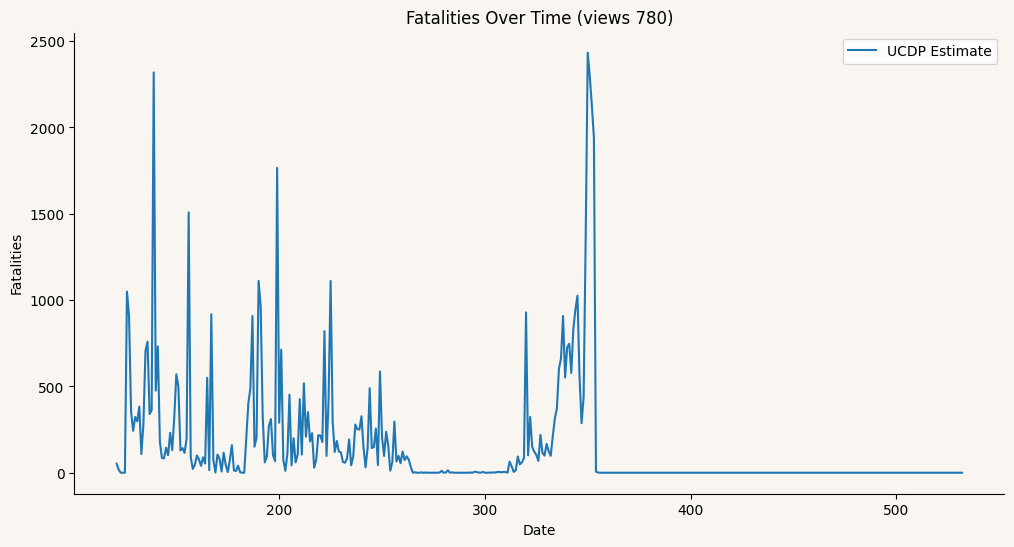

In [19]:
# example of using the component cleaner 
gw_id = 780
## 700: afghanistan 
## 780: sri lanka 

cleaner = VIEWSCleaner(filename, gw_id)
country_features = cleaner.features
cleaner.plot()


In [20]:
country_features['ged_sb'].mean()


147.40776699029126